#### 출처:
https://datascienceschool.net/03%20machine%20learning/01.01%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EC%9D%98%20%EC%86%8C%EA%B0%9C.html 
# 1.1 데이터 분석의 소개

--------------------------

* 대략적인 데이터 분포 확인

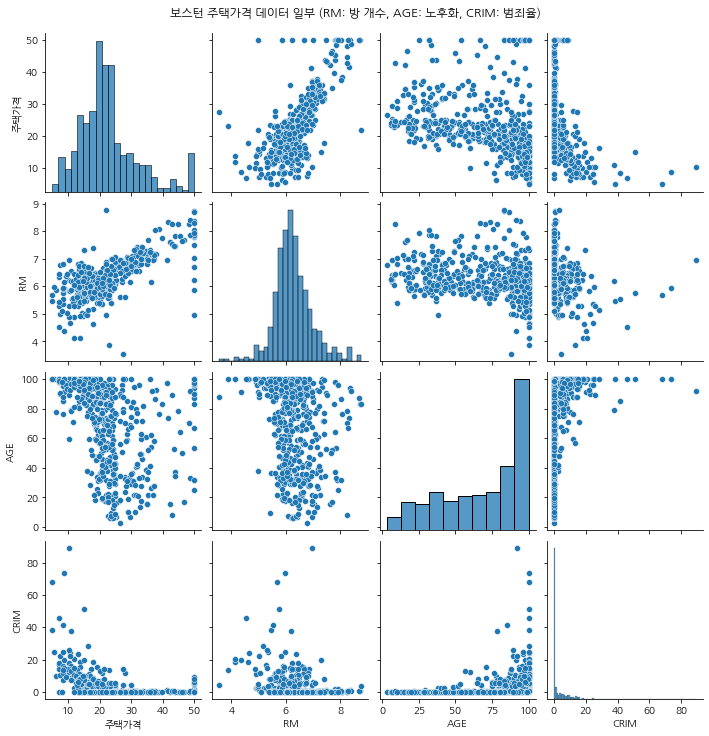

In [11]:
from sklearn.datasets import load_boston # 보스턴 하우징 프라이스 데이터를 로드한다.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['axes.unicode_minus'] = False # 음수(-) 글자 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["주택가격"] = boston.target
g = sns.pairplot(df[["주택가격", "RM", "AGE", "CRIM"]]) # pairplot:3차원이상의 데이터의 상관관계,분포를 한 번에 볼때 사용,hue로 그룹별로 볼수 있다. 다 그래프 사용시 seaborn 갤러리(https://seaborn.pydata.org/examples/index.html)참조
g.fig.suptitle("보스턴 주택가격 데이터 일부 (RM: 방 개수, AGE: 노후화, CRIM: 범죄율)", y=1.02)
plt.show()

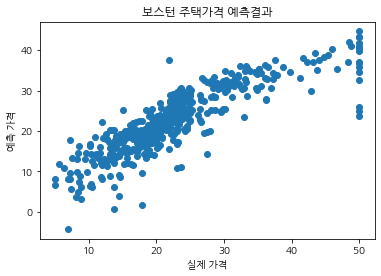

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.scatter(boston.target, predicted)
plt.xlabel("실제 가격")
plt.ylabel("예측 가격")
plt.title("보스턴 주택가격 예측결과")
plt.show()

In [17]:
from sklearn.datasets import load_iris #r에 있는 iris데이터와 동일
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names) # 설명변수 설정 
sy = pd.Series(iris.target, dtype="category") # 종속변수 설정
sy = sy.cat.rename_categories(iris.target_names) # 카테고리 자료형에 대해선 https://steadiness-193.tistory.com/233 참고
df['species'] = sy

np.random.seed(0)
df.sample(frac=1).reset_index(drop=True).head(10) # sample함수로 랜덤샘플링, 해당 함수 메서드에 관해선 https://kongdols-room.tistory.com/125 참고

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


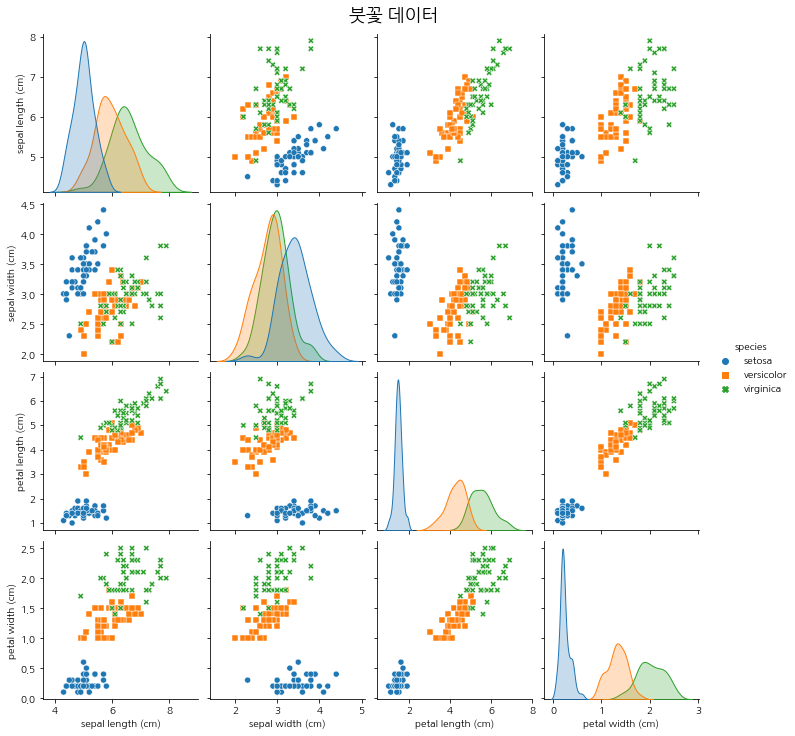

In [21]:
sns.pairplot(df, hue="species", markers=["o", "s", "X"]) # maker:[',', '.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'] https://github.com/mwaskom/seaborn/issues/1624#issuecomment-727547562 참조
plt.suptitle("붓꽃 데이터", y=1.02, fontsize=18)
plt.show()

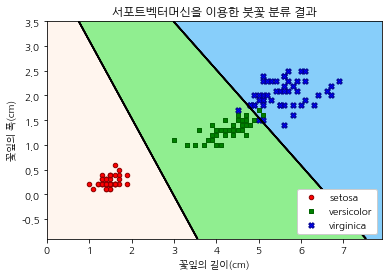

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib as mpl

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label=iris.target_names[0],marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label=iris.target_names[1],marker="s", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30, label=iris.target_names[2],marker="X", edgecolors="darkblue", facecolors="blue")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("꽃잎의 길이(cm)")
plt.ylabel("꽃잎의 폭(cm)")
plt.title("서포트벡터머신을 이용한 붓꽃 분류 결과")
plt.legend(loc="lower right", framealpha=1)
plt.show()

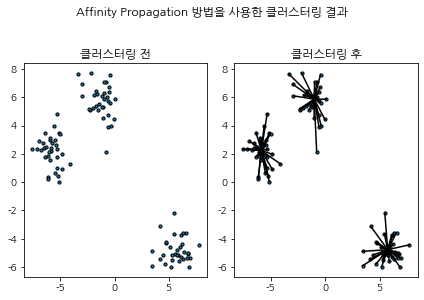

In [47]:
from sklearn.datasets import make_blobs # 가상 데이터 생성
from sklearn.cluster import AffinityPropagation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X, _ = make_blobs(n_features=2, centers=3, random_state=1234)
model = AffinityPropagation().fit(X)


plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k")
plt.title("클러스터링 전")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k")
plt.title("클러스터링 후")

for k in range(3): # 여기서부터 center와 각 point를 잇는 직선을 린다.
    cluster_center = X[model.cluster_centers_indices_[k]]
    for x in X[model.labels_ == k]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c="k")
        
plt.suptitle("Affinity Propagation 방법을 사용한 클러스터링 결과", y=1.03)
plt.tight_layout()
plt.show()